| Classe                 | Attributi obbligatori                                                                     | Metodi minimi                                          |
| ---------------------- | ----------------------------------------------------------------------------------------- | ------------------------------------------------------ |
| **Persona**            | `nome`, `cognome`, `codice` (id univoco)                                  | `stampa_persona()`       |
| **Esame**              | `nome`, `crediti`, `voto` (0‑30)                                                          | `stampa_esame()`         |
| **Studente (Persona)** | **tutti** quelli di `Persona` + `corso_di_studi`, `matricola`, `esami` (lista di `Esame`) | `aggiungi_esame(ex)`, `media_ponderata()` |


.
.
.
.
.
.
.
.
.
.
.

# Pandas 🐼🐼🐼

### Miglior strumento di data wrangling

Pandas è ideale per il data wrangling, ovvero il processo di trasformazione e pulizia dei dati grezzi per analisi e modelli, mentre NumPy eccelle nei calcoli intensivi una volta che il dataset è pronto.

| Esigenza tipica                                                  | Funzionalità Pandas                     | Quando serve                                                                |
| ---------------------------------------------------------------- | --------------------------------------- | --------------------------------------------------------------------------- |
| 1. **Importare** formati eterogenei (CSV, Excel, TSV, JSON, SQL) | `read_*()`                              | Ogni volta che i dati provengono da laboratori, EHR, registry o altri dispositivi |
| 2. **Pulire** dati sporchi o parziali                            | `dropna`, `fillna`, `astype`, `replace` | Prima di qualsiasi statistica o di usarli per Machine Learning                                          |
| 3. **Ristrutturare** il dataset (modificarne la struttura per facilitarne l’analisi o per adattarlo a specifiche esigenze)                                  | `melt`, `pivot`, `stack/unstack`        | Per allineare o sistemare misure longitudinali, matrici di espressione...                 |
| 4. **Filtrare & creare sottogruppi**                                    | Boolean indexing, `query`, `groupby`    | Focus su un fenotipo, un trattamento, un gene...                               |
| 5. **Aggregare & statistiche rapide**                            | `groupby().agg()`, `describe`           | Report clinici, cruscotti QC (Quality Control)...                                                |
| 6. **Merge/Join** di più fonti                                   | `merge`, `concat`                       | Integrare imaging + clinica + omics (Dati omici → Genomica, trascrittomica, proteomica, metabolomica)                                         |
| 7. **Time series per il monitoraggio continuo**                                               | `to_datetime`, `resample`, `rolling`    | Wearable, follow-up, Analisi di segnali continui in terapia intensiva (ICU waveform analysis)...                                           |


### Perché non basta usare liste Python o array NumPy al posto di Pandas?

| Esigenza tipica nei dati biomedici                     | Liste Python                                | NumPy array                                           | Pandas DataFrame                                |
| ------------------------------------------------------ | ------------------------------------------- | ----------------------------------------------------- | ----------------------------------------------- |
| **Etichette (ID paziente, nome gene, tempo)**          | ❌ gestite “a mano” con strutture ausiliarie | ❌ non esistono; solo indici interi                    | ✅ `index`, `columns`, gerarchici (`MultiIndex`) |
| **Gestire dati eterogenei** (numeri + stringhe + date)         | ✅ ma zero funzioni vettoriali               | ⚠️ possibile con `dtype=object`, ma perde in performance | ✅ colonne con tipi diversi, ottimizzate         |
| **Valori mancanti** (`NaN`, `None`, sentinel)          | ❌ serve logica ad-hoc                       | ⚠️ `np.nan` solo per float; complicato per tipi misti | ✅ `isna` per identificare valori mancanti, `fillna`per riempire valori mancanti, propagazione coerente per propagare il valore precedente o successivo nelle celle vuote.       |
| **Operazioni “SQL-like”** (`groupby`, `join`, `pivot`) | ❌ codice manuale e ciclo esplicito          | ❌ non previste                                        | ✅ una riga di codice idiomatica (ovvero con funzioni intuitive e efficienti)                |
| **Time series**             | ❌ da implementare                           | ⚠️ serve `np.searchsorted`/for loop                   | ✅ API dedicate (`resample` per aggregazione a intervalli temporali, `rolling` per applicare operazioni statistiche su una finestra mobile di dati, `shift` per confrontare valori tra istanti di tempo diversi) |
| **I/O (input/output) nativo** (CSV, Excel, SQL, Parquet)              | ❌ librerie esterne, parsing manuale         | ❌ idem                                                | ✅ `read_*`, `to_*` tutte funzioni one-liner                    |
| **Leggibilità notebook/paper**                         | 😐 spesso 3-4 strutture parallele           | 😐 array senza intestazioni esplicite                             | 😀 tabelle auto-formattate                      |


### 🏥 1 | Analisi di dataset clinici multifattoriali
(= studiare dati sanitari considerando più variabili contemporaneamente, come età, sesso, genetica, stile di vita, parametri fisiologici ...)

Scenario:
Analisi di parametri clinici di pazienti con diverse diagnosi per identificare correlazioni e pattern significativi.

## Preparazione dei file di dati
Creiamo un file CSV e un file Excel con un piccolo dataset di esempio. In questo modo, potremo esercitarci con la lettura e la manipolazione dei dati.

In [19]:
import pandas as pd

# Dati di esempio
data = {
    'paziente_id': [1, 2, 3, 4, 5],
    'età': [45, 52, 67, 38, 71],
    'glicemia': [95, 105, 142, 88, 170]
}
df_demo = pd.DataFrame(data)

# Salvataggio in CSV e Excel
df_demo.to_csv('files/pazienti_demo.csv', index=False)
df_demo.to_excel('files/pazienti_demo.xlsx', index=False)

print('File creati: files/pazienti_demo.csv e files/pazienti_demo.xlsx')

File creati: files/pazienti_demo.csv e files/pazienti_demo.xlsx


## Esempio

1. Carichiamo il file CSV appena creato
2. Visualizziamo le prime righe
3. Calcoliamo statistiche di base
4. Filtriamo i pazienti con glicemia alta

In [20]:
import pandas as pd

# 1. Carichiamo i dati
df = pd.read_csv('files/pazienti_demo.csv')

# 2. Visualizziamo le prime righe
print(df.head())

# 3. Statistiche di base
print(df.describe())

# 4. Filtraggio
df_alta = df[df['glicemia'] > 100]
print('Pazienti con glicemia > 100:')
print(df_alta)

   paziente_id  età  glicemia
0            1   45        95
1            2   52       105
2            3   67       142
3            4   38        88
4            5   71       170
       paziente_id        età    glicemia
count     5.000000   5.000000    5.000000
mean      3.000000  54.600000  120.000000
std       1.581139  14.117365   34.849677
min       1.000000  38.000000   88.000000
25%       2.000000  45.000000   95.000000
50%       3.000000  52.000000  105.000000
75%       4.000000  67.000000  142.000000
max       5.000000  71.000000  170.000000
Pazienti con glicemia > 100:
   paziente_id  età  glicemia
1            2   52       105
2            3   67       142
4            5   71       170


Utilità:
- Pulizia nomenclatura diagnosi
- Statistiche descrittive per reparto
- Individuazione outlier (df[df["HbA1c"]>12])
- Esportazione rapida in Excel per il board clinico (stats.to_excel("summary.xlsx"))

{Tabella heat-map dei valori medi di HbA1c per diagnosi}

## Appunto sui file
###Cosa sono

Pandas eccelle nella gestione di file di dati, che è uno dei suoi punti di forza principali. Questo codice include:
- Lettura e scrittura di diversi formati file: CSV, Excel, TSV, JSON, SQL
- Opzioni di lettura avanzate: gestione separatori, encoding, intestazioni personalizzate, - - gestione dei valori mancanti

Un file è un contenitore di dati salvati su disco (es. CSV, TXT, Excel, immagini, audio...)
Python può aprire, leggere, modificare e salvare file, come se li “sfogliasse riga per riga” o li caricassi in memoria come tabelle.
.

### Modi principali per lavorare con file in Python
1.File di testo (.txt, .csv, .tsv, .json, .log)

In [2]:
with open("files/data.txt", "r") as f:
    contenuto = f.read()         # Legge tutto il file come stringa

2. File strutturati come tabelle (CSV, Excel, TSV)
Qui entra in gioco Pandas, che ti fa risparmiare ore:

In [ ]:
import pandas as pd

df = pd.read_csv("pazienti.csv")         # CSV = valori separati da virgole
df = pd.read_excel("analisi.xlsx")       # Legge un file Excel
df = pd.read_json("dati.json")           # Legge un file JSON

Pandas riconosce automaticamente il formato dei dati, crea una tabella (DataFrame) e assegna intestazioni e indici.

### Come si integrano i file con le librerie scientifiche
| Obiettivo                | Funzione Python/Pandas            |
| ------------------------ | --------------------------------- |
| Leggere un file          | `open()`, `pd.read_csv()`, ecc.   |
| Scrivere su file         | `write()`, `df.to_csv()`          |
| Elaborare i dati         | Manipolazione tramite Pandas      |
| Lavorare con file grandi | `chunksize`, `Parquet`, `feather` |

Esempio:

In [ ]:
df = pd.read_csv("espressione_genica.tsv", sep="\t")  # leggo da file
df.to_csv("risultati_filtrati.csv")                   # salvo su file

### Studi di Coorte Longitudinali
Scenario:
Analisi longitudinale di pazienti in uno studio clinico per valutare l'efficacia di diversi trattamenti nel tempo.

In [34]:
# Esempio semplificato di studio di coorte longitudinale
import pandas as pd

# Dati di base (baseline)
baseline = pd.read_csv('files/coorte_baseline.csv')
# ID pazienti
# punteggi iniziali

# Dati di follow-up a 3 mesi
followup = pd.read_csv("files/coorte_followup.csv")
# mese di follow-up
# punteggi a 3 mesi


# Unione dei DataFrame con join esplicito
df = baseline.merge(followup, on='patient_id')  # merge basato su patient_id

# Calcolo della variazione del punteggio
# delta = score follow-up - punteggio baseline
df['delta_score'] = df['score'] - df['baseline_score']

# Visualizza il risultato finale
df

,patient_id,baseline_score,visit_month,score,delta_score
0,1,50,3,42,-8
1,2,55,3,56,1
2,3,65,3,44,-21


Utilità:
- Ordinamento e calcolo di intervalli temporali
- Analisi per paziente o sottogruppo
- Calcolo della progressione (delta valori nel tempo)

{Grafico temporale con andamento di biomarcatori in un paziente nel tempo}

# Numpy

NumPy è una libreria Python che fornisce una struttura dati semplice ma potente: l'array n-dimensionale.

**Perché scegliere NumPy**
Pur conoscendo già Python “puro” (con i suoi cicli `for`, la lettura/scrittura di CSV, ecc.), NumPy introduce un paradigma che offre vantaggi concreti:

1. **Maggiore velocità**

   * NumPy utilizza algoritmi implementati in C, che eseguono operazioni in nanosecondi anziché in secondi.
2. **Riduzione dei cicli**

   * Grazie alle strutture array, è possibile comporre operazioni vettoriali che eliminano gran parte dei loop manuali e l’indice di iterazione.
3. **Codice più leggibile**

   * Senza cicli annidati, le espressioni nel codice assomigliano molto di più alle equazioni matematiche che si vogliono calcolare.
4. **Alta qualità e affidabilità**

   * Un’ampia comunità di sviluppatori mantiene NumPy veloce, di facile utilizzo e privo di bug.

**Conclusione**
Questi fattori hanno reso NumPy lo standard “de facto” per gli array multidimensionali in Python applicato alla data science. Molte librerie popolari si basano su NumPy: impararlo fornisce una solida base su cui poi sviluppare competenze più avanzate in ambiti specifici.


In [4]:
%%bash
# attiviamo l'ambiente virutale
. .venv/bin/activate
# Installiamo numpy
pip install numpy

In [5]:
import numpy as np

CURVE_CENTER = 80 # Sintassi standard per le costanti
grades = np.array([72, 35, 64, 88, 51, 90, 74, 12])
grades_list = [72, 35, 64, 88, 51, 90, 74, 12]

print(grades)
print(grades_list)

[72 35 64 88 51 90 74 12]
[72, 35, 64, 88, 51, 90, 74, 12]


In [13]:
print(type(grades))
print(type(grades_list))
print(grades.dtype)
# print(grades_list.dtype) <- dtype fa parte di numpy, questo è sbagliato!

<class 'numpy.ndarray'>
<class 'list'>
int64


In [7]:
def curve(grades):
     average = grades.mean()
     change = CURVE_CENTER - average
     new_grades = grades + change
     return np.clip(new_grades, grades, 100)

curve(grades)

array([ 91.25,  54.25,  83.25, 100.  ,  70.25, 100.  ,  93.25,  31.25])

1. **Importazione di NumPy**
   Alla riga 1 si importa la libreria NumPy con l’alias `np`, una convenzione che abbrevia i comandi successivi.

2. **Creazione dell’array**
   Alla riga 3 si definisce un array monodimensionale chiamato `grades` di lunghezza 8 e tipo `int64`. In seguito esplorerai forma e tipo dei dati più a fondo, ma per ora basti sapere che hai un vettore di 8 valori interi.

3. **Calcolo della media**
   Alla riga 5 si richiama il metodo `.mean()` sull’array: in un solo passaggio NumPy somma tutti gli elementi e ne restituisce la media. Gli array di NumPy dispongono di numerosi metodi analoghi per operazioni statistiche o matematiche.

4. **Vectorization e Broadcasting**
   Alla riga 7 si sfruttano due concetti chiave:

   * **Vectorization**: l’operazione (es. somma di uno stesso valore) viene applicata simultaneamente a tutti gli elementi dell’array, eliminando la necessità di cicli espliciti.
   * **Broadcasting**: NumPy “allinea” array di forme diverse per permettere calcoli vettoriali fra loro. Qui `grades` è un array shape `(8,)` e `change` è uno scalare shape `(1,)`; NumPy aggiunge automaticamente `change` a ciascun elemento di `grades`. Non avrebbe funzionato se grades fosse stata una lista!

5. **Clipping dei valori**
   Alla riga 8 si utilizza la funzione `np.clip()`, che garantisce che i voti “curve‑dati” non scendano sotto un minimo né superino un massimo.

   * Il secondo argomento di `clip()` è proprio l’array originale `grades`: così ogni voto corretto non scende mai al di sotto del suo valore iniziale.
   * Il terzo argomento è lo scalare `100`, che tramite broadcasting assicura che nessun voto ecceda il 100%.

> **Consiglio**: NumPy mette a disposizione decine di funzioni e metodi specializzati. Se ti sembra di ripetere operazioni comuni o di dover scrivere cicli, consulta la documentazione: molto probabilmente esiste già una routine adatta.


In [ ]:
%%bash
# installiamo matplotlib
pip install numpy matplotlib

## Forme degli array (Shape)

* **Shape** è la tupla che descrive la dimensione di ciascun asse di un array.
* Ogni array NumPy espone la proprietà `.shape`, che restituisce tale tupla.
* È fondamentale che gli array abbiano la forma che le funzioni si aspettano: un controllo rapido è stampare l’array insieme a `array.shape`.

**Esempio: creazione e verifica di un array 3D 2×2×3**

In [16]:
import numpy as np

# Creo un vettore di 12 temperature e lo rimodello in un blocco 2×2×3
temperatures = np.array([
    29.3, 42.1, 18.8, 16.1, 38.0, 12.5,
    12.6, 49.9, 38.6, 31.3,  9.2, 22.2
]).reshape(2, 2, 3)
# Verifico la shape
print(temperatures.shape)

# Visualizzo l’array
print(temperatures)

(2, 2, 3)
[[[29.3 42.1 18.8]
  [16.1 38.  12.5]]

 [[12.6 49.9 38.6]
  [31.3  9.2 22.2]]]


In [15]:
# Supponiamo di voler selezionare la temperatura 22.2
temperature = temperatures[1, 1, 2]
# ["tabella", "riga", "colonn"]
temperature

np.float64(22.2)

* Con tre o più dimensioni diventa difficile “vedere” i dati; per questo è utile

  * ribaltare (“swap”) assi con `.swapaxes()`
  * stampare shape e contenuto finché non si è certi della disposizione.

**Esempio: scambiare l’asse 1 con l’asse 2**

In [ ]:
reordered = np.swapaxes(temperatures, 1, 2)
print(reordered)

## Assi (Axes)

* Gli **assi** indicano le dimensioni ed sono indicizzati da 0 in su.

  * In un array 2D, `axis=0` è l’asse verticale (righe), `axis=1` quello orizzontale (colonne).
* Molte funzioni NumPy cambiano comportamento a seconda dell’argomento `axis`.

**Esempio con `.max()`**

In [ ]:
import numpy as np

table = np.array([
    [5, 3, 7, 1],
    [2, 6, 7, 9],
    [1, 1, 1, 1],
    [4, 3, 2, 0],
])

# Massimo sull’intero array
print(table.max())        # 9

# Massimo per ciascuna colonna (asse 0)
print(table.max(axis=0))  # array([5, 6, 7, 9])

# Massimo per ciascuna riga (asse 1)
print(table.max(axis=1))  # array([7, 9, 1, 4])

* **Senza `axis`** → funzione su tutti i valori.
* **Con `axis=k`** → operazione lungo l’asse k, restituisce un array con dimensione ridotta di 1.

---

## Broadcasting

La regola fondamentale:

> Due array possono “broadcastarsi” se, per ogni asse, o hanno la stessa lunghezza, oppure almeno uno dei due è pari a 1.

* Se in un asse una dimensione vale 1, NumPy **duplica** quel dato lungo quell’asse.
* Se le dimensioni coincidono, operazione elemento-per-elemento.

**Esempio formale:**

* `A.shape = (4, 1, 8)`
* `B.shape = (1, 6, 8)`

| Asse   | A | B | Azione                 |
| ------ | - | - | ---------------------- |
| asse 0 | 4 | 1 | B duplicato 4 volte    |
| asse 1 | 1 | 6 | A duplicato 6 volte    |
| asse 2 | 8 | 8 | dimensioni uguali → OK |

**Creazione degli array**

In NumPy, il **broadcasting** è un meccanismo che permette di eseguire operazioni aritmetiche tra array di forma diversa, “allineando” automaticamente le dimensioni più piccole a quelle maggiori senza copiare fisicamente i dati. In pratica, NumPy “espande” (broadcast) l’array di dimensione inferiore lungo le dimensioni mancanti o di lunghezza 1, così da poter applicare l’operazione elemento per elemento.

---

## 1. Perché serve il broadcasting?

Senza broadcasting, se volessi sommare un array 1-D di forma `(3,)` a un array 2-D di forma `(2,3)`, dovresti prima replicare il vettore in righe o colonne per avere due righe identiche, fare il sum, e poi (eventualmente) liberarti delle copie. Broadcasting ti risparmia sia la scrittura di questo codice sia l’allocazione di memoria aggiuntiva.

---

## 2. Regole di broadcasting

Quando cerchi di combinare due array `A` e `B`, NumPy confronta le loro forme (shape) dimensione per dimensione, partendo dall’ultima (i.e. righe vs righe, colonne vs colonne, e così via verso sinistra):

1. **Allineamento delle dimensioni**

   * Se le forme hanno lunghezze diverse, vengono “allineate” a destra aggiungendo virtualmente dimensioni di lunghezza 1 a sinistra dell’array più corto.
   * Es.:

     * `shape A = (2, 3)`
     * `shape B =     (3,)`
       → NumPy interpreta `B` come `(1, 3)`.

2. **Compatibilità lungo ogni dimensione**
   Per ciascuna coppia di dimensioni (ora allineate):

   * Sono compatibili se sono uguali, oppure
   * Se una delle due è 1.

3. **Espansione virtuale**
   Quando una dimensione di un array è 1 (o era “in più” a sinistra), NumPy la “espande” ripetendo il contenuto lungo quella dimensione senza allocare nuovamente i dati.

Se queste regole non sono soddisfatte, NumPy alza un errore di shape mismatch.

---

## 3. Esempi pratici

### 3.1 Vettore + Matrice

In [39]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6]])     # shape (2,3)
B = np.array([10, 20, 30])    # shape (3,)

# Broadcasting: B interpretato come (1,3), poi espanso a (2,3)
C = A + B
C

array([[11, 22, 33],
       [14, 25, 36]])

### 3.2 Matrice + colonna costante

In [40]:
v = np.array([1,2])           # shape (2,)
M = np.ones((3,2)) * 5        # shape (3,2)

# v viene interpretato come (1,2) e poi espanso a (3,2)
# oppure pensalo come aggiungere il vettore riga a ogni riga di M
R = M + v
R

array([[6., 7.],
       [6., 7.],
       [6., 7.]])

### 3.3 Aggiungere uno scalare

Ogni scalare è un array di shape `()`, compatibile con qualsiasi shape.

In [41]:
X = np.arange(6).reshape(2,3)
Y = X * 2      # moltiplicazione scalare; ogni elemento di X viene raddoppiato

### 3.4 Broadcasting su più dimensioni

In [42]:
# A: shape (4,3,2)
# B: shape (   1,2) → interpretato come (1,1,2) → espanso a (4,3,2)
A = np.zeros((4,3,2))
B = np.array([[7,8]])       # shape (1,2)
C = A + B                   # risultato (4,3,2), ogni “piano” A[i,j,:] + [7,8]

### facendo il punto...

* **Shape** e **axes** sono la base per navigare array multidimensionali.
* Controlla sempre `.shape` e, quando serve, usa `.swapaxes()` o funzioni con `axis=`.
* Comprendere il **broadcasting** permette di scrivere calcoli vettoriali puliti e veloci, evitando loop espliciti.


---

## 1. Indicizzazione (Indexing)

* **Concetti base**: indici positivi/negativi, slicing con `:`, salto di elementi con `::`.
* **Multi-asse**: NumPy usa la virgola per separare le dimensioni in un unico indice.

**Esempio: Quadrato magico di Dürer**
Si crea un array 4×4 e si verifica che righe, colonne e quadranti sommino sempre a 34:

In [ ]:
import numpy as np

square = np.array([
    [16,  3,  2, 13],
    [ 5, 10, 11,  8],
    [ 9,  6,  7, 12],
    [ 4, 15, 14,  1]
])

# Ricordo: In Python, assert è una forma compatta di “controllo”
# che verifica che una certa condizione (espressione booleana) sia vera.
# Se la condizione è falsa, il programma interrompe l’esecuzione
# lanciando un’eccezione di tipo AssertionError, altrimenti
# continua “silenziosamente”.

# Righe e colonne
for i in range(4):
    assert square[:, i].sum() == 34   # colonna i
    assert square[i, :].sum() == 34   # riga i

# Quadranti 2×2
assert square[:2, :2].sum() == 34
assert square[2:, :2].sum() == 34
assert square[:2, 2:].sum() == 34
assert square[2:, 2:].sum() == 34

* **Somma globale** con `square.sum()`.
* **Somma per asse** con `square.sum(axis=…)`.

---

## 2. Mascheramento e filtraggio (Masking & Filtering)

* Un **mask** è un array booleano della stessa forma dei dati.
* Selezione non sequenziale: `data[mask]` restituisce tutti gli elementi in cui il mask è `True`.

**Esempio 1: Numeri divisibili per 4**

In [43]:
import numpy as np

numbers = np.linspace(5, 50, 24, dtype=int).reshape(4, -1)
# numbers è una matrice 4×6 di interi

mask = numbers % 4 == 0        # True dove il valore è multiplo di 4
by_four = numbers[mask]        # array monodimensionale

print(by_four)

[ 8 12 16 20 24 28 32 36 40 44 48]



* **np.linspace**: genera n valori equispaziati.
* **dtype=int** forza l’arrotondamento per difetto.
* **reshape(4, -1)**: -1 calcola automaticamente la dimensione rimanente.

**Esempio 2: Filtrare una distribuzione normale**

In [ ]:
from numpy.random import default_rng

rng    = default_rng()
values = rng.standard_normal(10000)   # 10 000 campioni N(0,1)
std    = values.std()                 # deviazione standard

# seleziona valori in [-2σ, +2σ]
filtered = values[(values > -2*std) & (values < 2*std)]

print(filtered.size / values.size)    # ~0.9565 (95.65%)



* **Operatore `&`**: combina maschere in modo vettoriale.

---

## 3. Trasposizione, Ordinamento e Concatenazione

### Trasposizione


In [ ]:
import numpy as np

a = np.array([
    [1,2],
    [3,4],
    [5,6],
])

print(a.T)


* `a.T` è alias di `a.transpose()`.

### Ordinamento (Sorting)

In [ ]:
data = np.array([
    [7,1,4],
    [8,6,5],
    [1,2,3],
])

print(np.sort(data))            # per righe (asse -1)
print(np.sort(data, axis=0))    # per colonne
print(np.sort(data, axis=None)) # array appiattito e ordinato globalmente

### Concatenazione

In [ ]:
a = np.array([[4,8],[6,1]])
b = np.array([[3,5],[7,2]])

print(np.hstack((a, b)))            # orizzontale
print(np.vstack((b, a)))            # verticale
print(np.concatenate((a, b)))       # assieme, per righe
print(np.concatenate((a, b), axis=None))  # array piatto


* Funzioni helper: `hstack`, `vstack`; generica: `concatenate`, sempre con una tupla di array.

---

## 4. Aggregazione (Aggregating)

* Metodi utili per ridurre dimensioni:

  * `.sum()`  — somma
  * `.max()`  — massimo
  * `.mean()` — media
  * `.std()`  — deviazione standard
* Accettano `axis` per aggregare lungo una dimensione specifica.

Queste operazioni sono fondamentali per analisi statistiche e finanziarie con NumPy.


# Introduzione a Matplotlib 📊

Matplotlib è la libreria di visualizzazione più utilizzata in Python. Permette di creare grafici di alta qualità con poche righe di codice, ma offre anche un controllo preciso su ogni elemento visivo quando necessario.



In [22]:
# Importazione standard
import matplotlib.pyplot as plt
import numpy as np

# Assicuriamo risultati riproducibili
np.random.seed(42)



## Gerarchia degli oggetti in Matplotlib

Matplotlib si basa su una gerarchia di oggetti:

1. **Figure**: il contenitore di alto livello che può contenere uno o più grafici
2. **Axes**: il grafico vero e proprio con assi, titoli, ecc.
3. **Elementi** più piccoli: linee, punti, testi, legende, ecc.

![Anatomia di un grafico Matplotlib](https://matplotlib.org/stable/_images/anatomy.png)

## Due approcci principali

Matplotlib offre due stili di utilizzo:

1. **Approccio statico** (pyplot): semplice e veloce per grafici base
2. **Approccio orientato agli oggetti**: più flessibile per grafici complessi



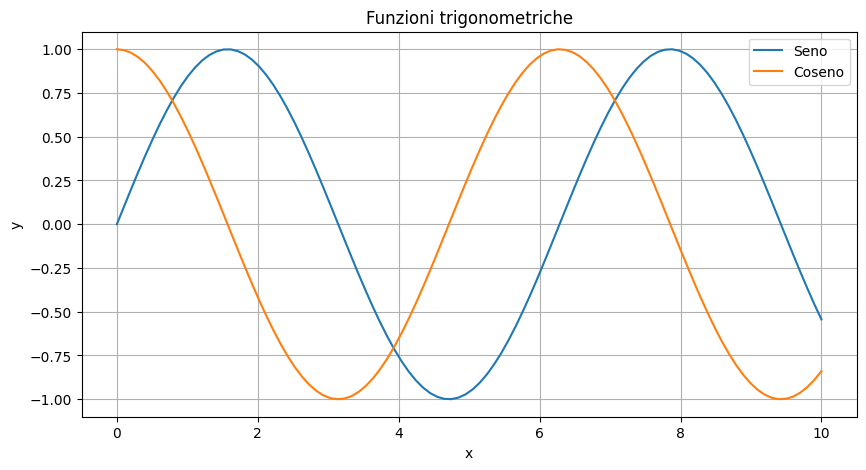

In [23]:
# Esempio di approccio statico
plt.figure(figsize=(10, 5))
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), label='Seno')
plt.plot(x, np.cos(x), label='Coseno')
plt.title("Funzioni trigonometriche")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

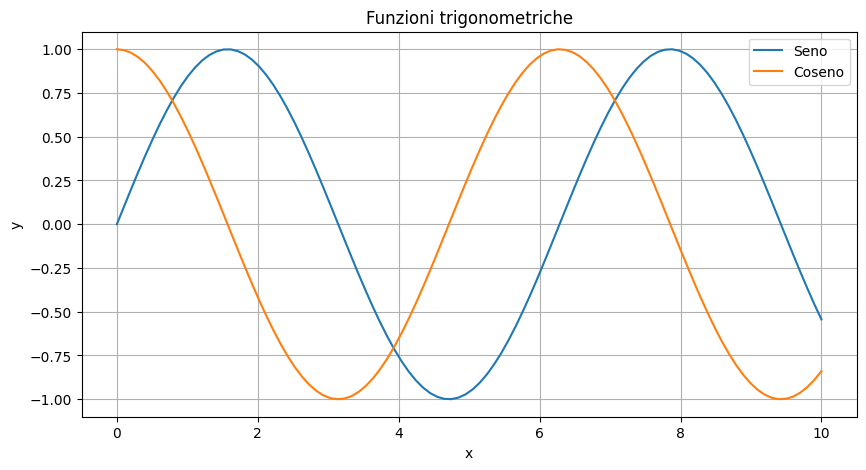

In [24]:
# Approccio orientato agli oggetti (più flessibile)
fig, ax = plt.subplots(figsize=(10, 5))
x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x), label='Seno')
ax.plot(x, np.cos(x), label='Coseno')
ax.set_title("Funzioni trigonometriche")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid(True)
plt.show()





## Grafici multipli con subplots

`plt.subplots()` è il modo migliore per creare più grafici in una singola figura:



In [ ]:
# Creare una griglia 2x2 di grafici
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Appiattire l'array di axes per semplicità
ax1, ax2, ax3, ax4 = axes.flatten()

# Grafico a linee
x = np.linspace(0, 10, 100)
ax1.plot(x, np.sin(x))
ax1.set_title("Grafico a linee")

# Grafico a dispersione
n = 50
x = np.random.rand(n)
y = np.random.rand(n)
colors = np.random.rand(n)
area = np.pi * (15 * np.random.rand(n))**2
ax2.scatter(x, y, s=area, c=colors, alpha=0.5)
ax2.set_title("Grafico a dispersione")

# Istogramma
x = np.random.normal(size=1000)
ax3.hist(x, bins=30)
ax3.set_title("Istogramma")

# Grafico a barre
categorie = ['A', 'B', 'C', 'D', 'E']
valori = np.random.randint(10, 100, size=5)
ax4.bar(categorie, valori)
ax4.set_title("Grafico a barre")

# Aggiustare il layout
fig.tight_layout()
plt.show()



## Personalizzazione dei grafici

Matplotlib offre un controllo dettagliato su ogni elemento del grafico:



In [ ]:
# Esempio di personalizzazione avanzata
fig, ax = plt.subplots(figsize=(10, 6))

# Dati
x = np.linspace(0, 10, 100)
y1 = np.exp(-x/10) * np.sin(x)
y2 = np.exp(-x/10) * np.cos(x)

# Creare linee con stili personalizzati
ax.plot(x, y1, 'b-', linewidth=2, label='$e^{-x/10} \sin(x)$')
ax.plot(x, y2, 'r--', linewidth=2, label='$e^{-x/10} \cos(x)$')

# Aggiungere riempimento sotto la curva
ax.fill_between(x, y1, alpha=0.2)

# Personalizzare assi e griglia
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)
ax.grid(True, linestyle='--', alpha=0.7)

# Aggiungere titolo e etichette
ax.set_title('Onde smorzate', fontsize=16)
ax.set_xlabel('Tempo (s)', fontsize=12)
ax.set_ylabel('Ampiezza', fontsize=12)

# Personalizzare la legenda
ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)

# Aggiungere annotazione
ax.annotate('Punto di interesse', 
            xy=(5, np.exp(-5/10)*np.sin(5)),
            xytext=(6, 0.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()



## Integrazione con Pandas

Matplotlib si integra perfettamente con Pandas:



In [ ]:
# Esempio di visualizzazione con Pandas
import pandas as pd

# Creare un DataFrame di esempio (simile a quello clinico visto prima)
df = pd.DataFrame({
    'gruppo': ['A']*10 + ['B']*10 + ['C']*10,
    'valore': np.random.normal(loc=[5, 7, 9], scale=[1, 1.5, 2], size=30)
})

# Visualizzazione grafica diretta da Pandas
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
df.boxplot(column='valore', by='gruppo', ax=ax[0])
ax[0].set_title('Boxplot per gruppo')
ax[0].set_ylabel('Valore')

# Grafico a barre dei valori medi per gruppo
means = df.groupby('gruppo')['valore'].mean()
ax[1].bar(means.index, means.values, yerr=df.groupby('gruppo')['valore'].std())
ax[1].set_title('Media per gruppo')
ax[1].set_xlabel('Gruppo')
ax[1].set_ylabel('Valore medio')

fig.suptitle('Confronto tra gruppi', fontsize=16)
plt.tight_layout()
plt.show()



## Consigli

1. **Usa l'approccio orientato agli oggetti** (`fig, ax = plt.subplots()`) per grafici complessi
2. **Impara a usare `tight_layout()`** per migliorare la spaziatura automaticamente
3. **Salva i grafici** con `plt.savefig('nome_file.png', dpi=300)` per alta qualità
4. **Esplora i diversi stili** con `plt.style.use('ggplot')` o altri stili predefiniti
5. **Non dimenticare `plt.show()`** alla fine, specialmente quando lavori fuori da Jupyter

Matplotlib può sembrare complessa all'inizio, ma una volta compresa la struttura gerarchica (Figure → Axes → elementi) e la differenza tra approccio statico e orientato agli oggetti, diventa uno strumento incredibilmente flessibile per la visualizzazione dei dati.